In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [6]:
data = pd.read_csv(r"C:\Users\lalit\Dropbox\Manipal Syllabus\Sem 2\Data Analytics\Datasets\iris_dataset.csv")
data.head()

,Sepal_length,Sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Question 1
Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (Hint: check out the dataframe .shape attribute.)
* The column names. (Hint: check out the dataframe .columns attribute.)
* The data types for each column. (Hint: check out the dataframe .dtypes attribute.)

In [9]:
data.shape

(150, 5)

In [10]:
data.columns

Index(['Sepal_length', 'Sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [11]:
data.dtypes

Sepal_length    float64
Sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

# Question 2
Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

Hint: there are multiple ways to do this, but you could use either the string processing methods or the apply method.

In [17]:
data['class'] = data['class'].str.replace('Iris-','')

# Alternate method
#data['class'] = data['class'].apply(lambda x:x.replace('Iris-',''))
data.head()

,Sepal_length,Sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Question 3
Determine the following:

* The number of each species present. (Hint: check out the series .value_counts method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.
Hint: for the last question, the .describe method does have median, but it's not called median. It's the 50% quantile. .describe does not have range though, and in order to get the range, you will need to create a new entry in the .describe table, which is max - min.

In [18]:
# No. of each species present
species = data['class'].value_counts()
print(species)

class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [27]:
stats = data[:-1].describe()
# loc is used to create a new row
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.rename({'50%':'median'},inplace=True)
stats.drop(index=['count','std','min','max'],axis=0,inplace=True)
stats

,Sepal_length,Sepal_width,petal_length,petal_width
mean,5.842953,3.054362,3.749664,1.194631
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
range,3.600000,2.400000,5.900000,2.400000


# Question 4
Calculate the following for each species in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.
Hint: you may want to use Pandas groupby method to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on applying multiple functions at once for a hint.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
mean_df = data.groupby('class').mean()
mean_df

,Sepal_length,Sepal_width,petal_length,petal_width
class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [34]:
median_df = data.groupby('class').median()
median_df

,Sepal_length,Sepal_width,petal_length,petal_width
class,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [37]:
mean_median_df = (data
                 .groupby('class')
                 .agg(['mean','median']))
mean_median_df

Sepal_length        Sepal_width        petal_length         \
                   mean median        mean median         mean median   
class                                                                   
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
class                          
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

# Question 5
Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.

<Axes: xlabel='Sepal_length', ylabel='Sepal_width'>

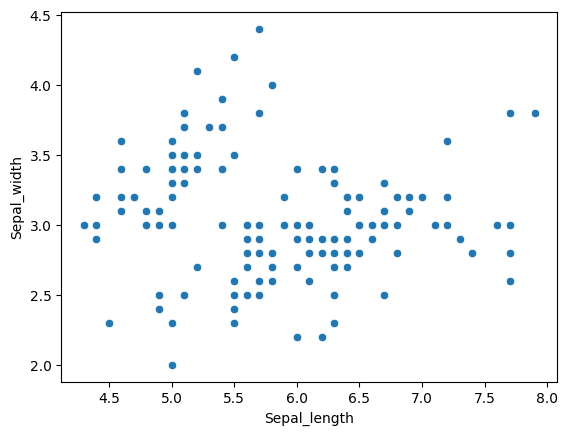

In [39]:
sns.scatterplot(data=data,x='Sepal_length',y='Sepal_width')

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

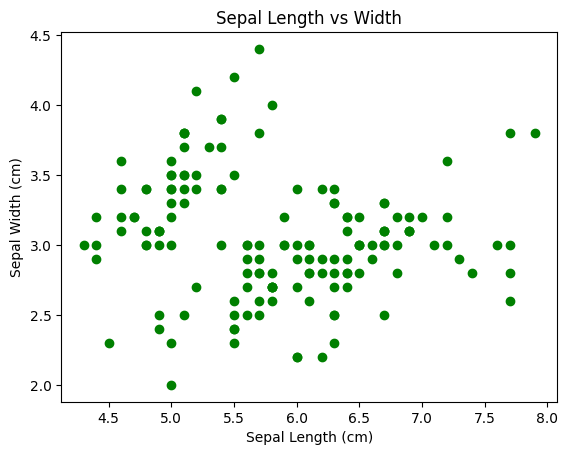

In [48]:
#Using matplotlib

ax = plt.axes()

ax.scatter(data.Sepal_length,
           data.Sepal_width,
           marker='o',
           c='green')

#Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')

# Question 6
Make a histogram of any one of the four features. Label axes and title it as appropriate.

[Text(0.5, 0, 'Sepal_width'), Text(0.5, 1.0, 'Sepal Width Distribution')]

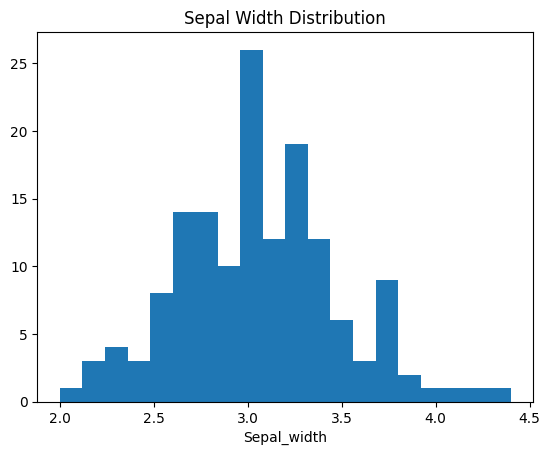

In [53]:
ax = plt.axes()

ax.hist(data.Sepal_width,bins=20)
ax.set(xlabel='Sepal_width',
       title='Sepal Width Distribution')

# Question 7
Now create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the visualization guide for Pandas.

Text(0.5, 0, 'Size (cm)')

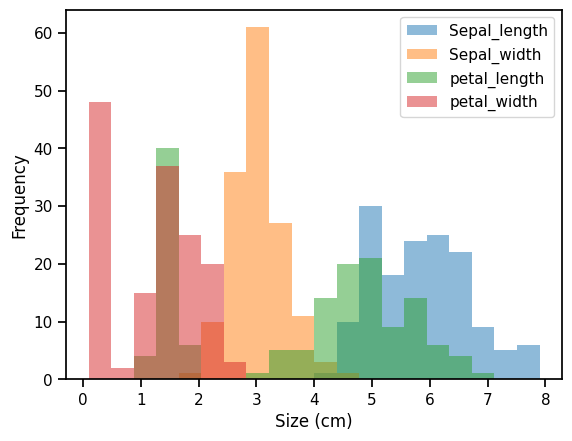

In [58]:
sns.set_context('notebook')

ax = data.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Size (cm)')

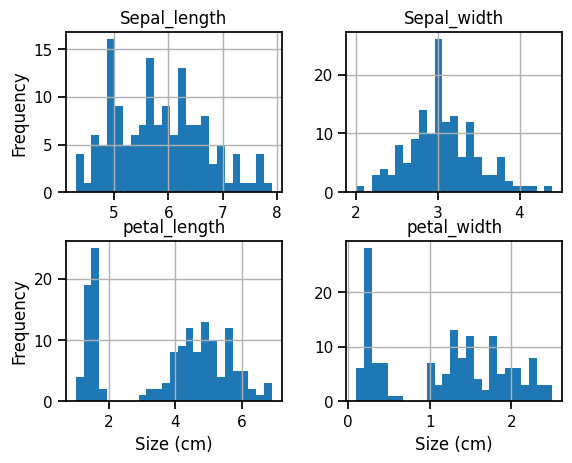

In [63]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)
rows, cols = axList.shape

# Add some x- and y- labels to first column and last row
for i, ax in enumerate(axList.flatten()):
    row, col = divmod(i, cols)
    if row == rows - 1:
        ax.set_xlabel('Size (cm)')
        
    if col == 0:
        ax.set_ylabel('Frequency')
### END SOLUTION

# Question 8
Using Seaborn, make a boxplot of each petal and sepal measurement.

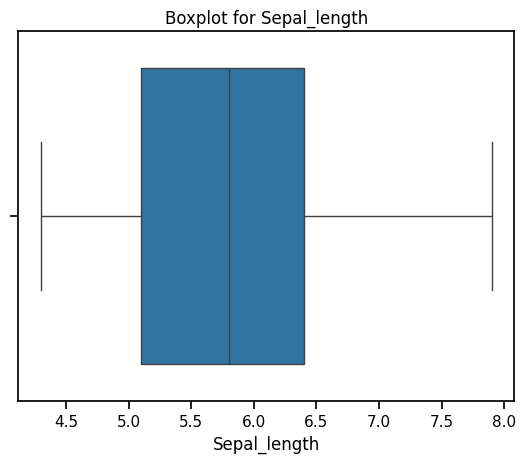

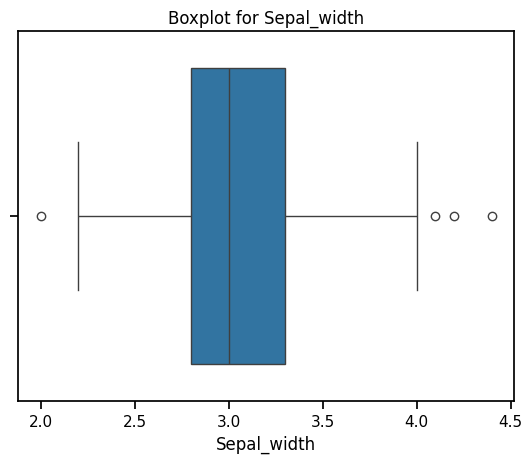

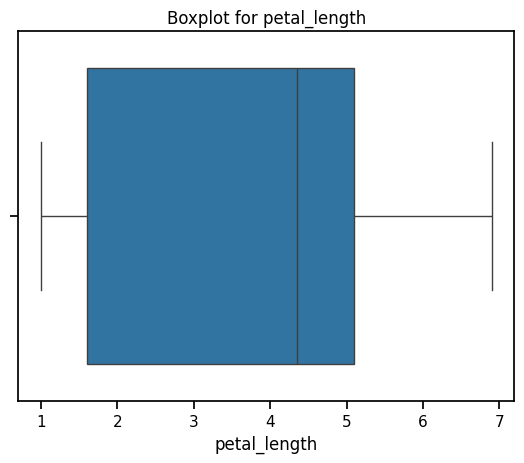

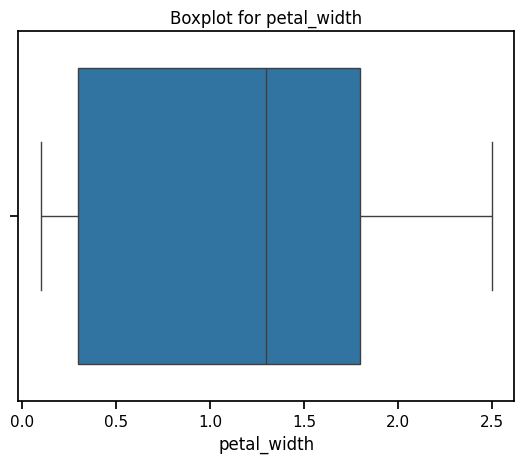

In [71]:
for col in data.columns[:-1]:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

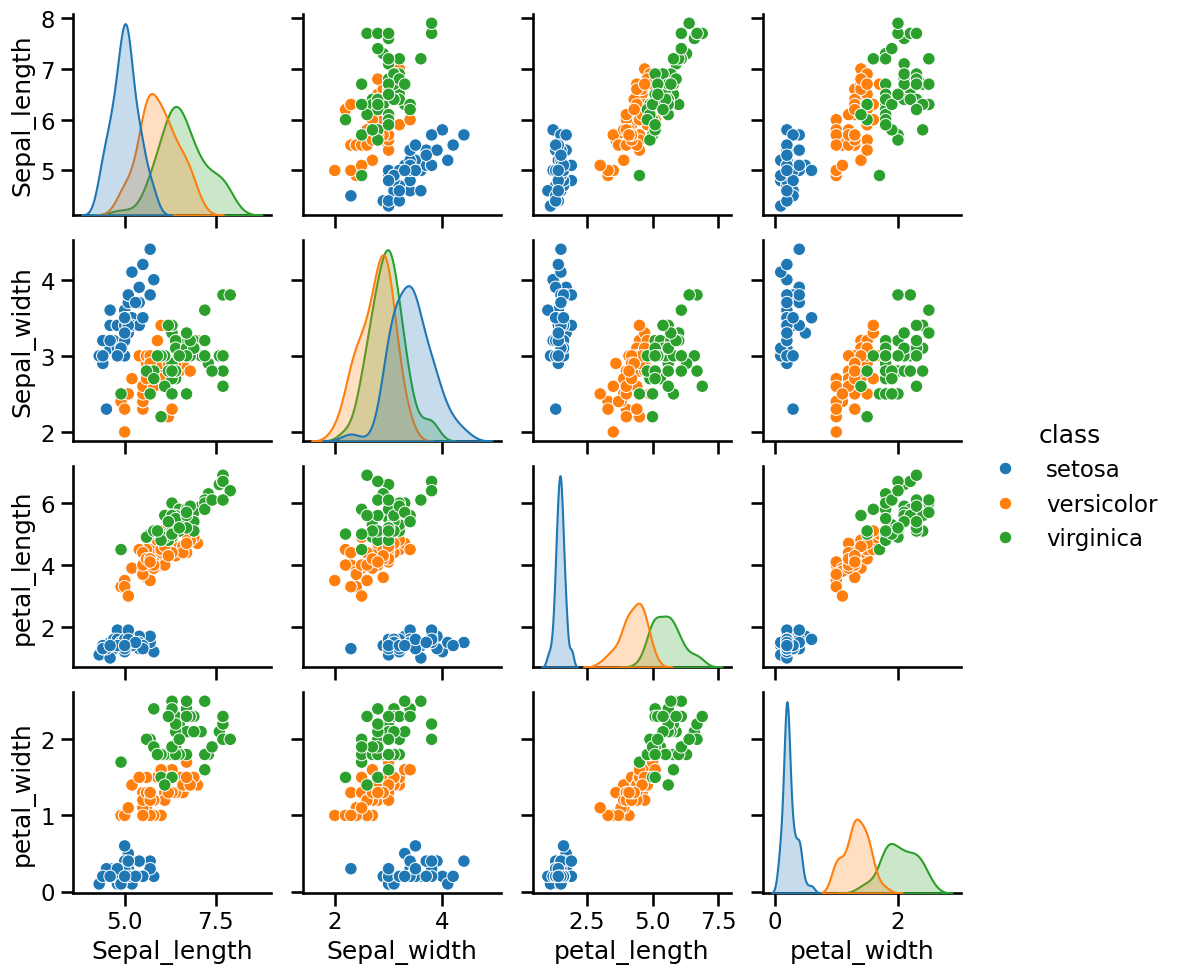

In [73]:
sns.set_context('talk')
sns.pairplot(data, hue='class')